# Preliminary ML Model Results 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler as Scaler

## Labels

- ER: 
  - 0 = neg
  - 1 = pos
- PR: 
  - 0 = neg
  - 1 = pos
- HER2:
  - 0 = neg
  - 1 = pos
  - 2 = borderline
- Mol Subtype:
  - 0 = luminal-like
  - 1 = ER/PR pos, HER2 pos
  - 2 = HER2
  - 3 = triple negative

In [2]:
import os 
current_script_path = os.path.abspath('KNN.ipynb')
relative_path_to_csv = os.path.join(os.path.dirname(current_script_path), '..', '../Data/Patient class labels.csv')
labels = pd.read_csv(relative_path_to_csv)
labels.head()

,Patient ID,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,0,0,1,2
1,Breast_MRI_002,0,0,0,3
2,Breast_MRI_003,1,1,0,0
3,Breast_MRI_004,1,1,0,0
4,Breast_MRI_005,1,0,1,1


In [3]:
import os 
current_script_path = os.path.abspath('KNN.ipynb')
relative_path_to_csv = os.path.join(os.path.dirname(current_script_path), '..', '../Data/pyradiomics_extraction_box_with_correct_mask.csv')
features = pd.read_csv(relative_path_to_csv)
features.head()

,patient,sequence,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,Breast_MRI_001,post_1,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,...,0.632174,0.594064,2.580368,0.004380,4.745944e+06,714.483384,0.000444,0.160234,0.019571,0.000443
1,Breast_MRI_002,post_1,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,...,0.436616,0.436616,3.339987,0.003194,4.028316e+06,253.258853,0.001130,0.113070,0.008739,0.001129
2,Breast_MRI_003,post_1,0.934408,0.286810,13.808210,48.144081,40.488107,43.126056,56.606869,57.665740,...,0.417277,0.417277,3.296646,0.004626,8.253185e+06,334.122497,0.000797,0.060139,0.002368,0.000793
3,Breast_MRI_004,post_1,0.707826,0.609522,8.893590,14.591090,11.420813,14.972284,14.477716,16.540987,...,0.472222,0.472222,1.921928,0.002806,5.031070e+05,1.433279,0.175459,0.006397,0.000027,0.162040
4,Breast_MRI_005,post_1,0.679296,0.424353,22.534695,53.103672,55.175581,49.674566,36.443449,58.274413,...,0.566351,0.566351,2.307185,0.000783,5.665065e+07,26.382136,0.009536,0.004559,0.000020,0.009259


In [4]:
post_features = features[features['sequence'] == 'post_1']
total_features = pd.merge(post_features, labels, left_on = 'patient', right_on = 'Patient ID').drop(columns = 'Patient ID')

In [5]:
total_features

,patient,sequence,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,post_1,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,...,4.745944e+06,714.483384,0.000444,0.160234,0.019571,0.000443,0,0,1,2
1,Breast_MRI_002,post_1,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,...,4.028316e+06,253.258853,0.001130,0.113070,0.008739,0.001129,0,0,0,3
2,Breast_MRI_003,post_1,0.934408,0.286810,13.808210,48.144081,40.488107,43.126056,56.606869,57.665740,...,8.253185e+06,334.122497,0.000797,0.060139,0.002368,0.000793,1,1,0,0
3,Breast_MRI_004,post_1,0.707826,0.609522,8.893590,14.591090,11.420813,14.972284,14.477716,16.540987,...,5.031070e+05,1.433279,0.175459,0.006397,0.000027,0.162040,1,1,0,0
4,Breast_MRI_005,post_1,0.679296,0.424353,22.534695,53.103672,55.175581,49.674566,36.443449,58.274413,...,5.665065e+07,26.382136,0.009536,0.004559,0.000020,0.009259,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Breast_MRI_918,post_1,0.877153,0.648783,29.186299,44.986213,45.886501,41.977361,51.383808,56.811793,...,7.408352e+07,185.710080,0.001439,0.021210,0.000886,0.001411,1,1,0,0
918,Breast_MRI_919,post_1,0.964239,0.648439,13.914028,21.457727,21.631462,21.084250,25.375225,27.677709,...,1.851005e+06,47.436404,0.005525,0.043527,0.001345,0.005336,1,1,0,0
919,Breast_MRI_920,post_1,0.877183,0.856791,15.749673,18.382163,19.038279,20.649190,20.505122,24.348411,...,3.036683e+06,4.777973,0.052622,0.007182,0.000027,0.053438,1,1,0,0
920,Breast_MRI_921,post_1,0.913000,0.800835,33.226543,41.489900,43.076382,45.448460,48.143552,55.603011,...,3.514451e+07,259.701406,0.001015,0.042512,0.001414,0.001006,1,1,0,0


# Training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression

In [7]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

SEED = 2454259

In [8]:
def train_test_val_splits(df, train_ratio = 0.8, val_ratio = 0.2, random_state = 2454259):
   
    val_ratio_adj = val_ratio / (1-train_ratio)

    train_df, val_df = train_test_split(df, train_size = train_ratio, random_state= random_state)
    val_df, test_df = train_test_split(val_df, train_size = val_ratio_adj, random_state= random_state)

    print(len(train_df))

    return train_df, val_df, test_df


In [9]:
train_df, val_df, test_df = train_test_val_splits(total_features.drop(columns = ['sequence', 'patient']), TRAIN_RATIO, VAL_RATIO, random_state = SEED)
len(train_df), len(val_df), len(test_df)

553


(553, 184, 185)

In [10]:
train_x, train_y_er, train_y_pr, train_y_her, train_y_mol_subtype = train_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), train_df['ER'], train_df['PR'], train_df['HER2'], train_df['Mol Subtype']
val_x, val_y_er, val_y_pr, val_y_her, val_y_mol_subtype = val_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), val_df['ER'], val_df['PR'], val_df['HER2'], val_df['Mol Subtype']
test_x, test_y_er, test_y_pr, test_y_her, test_y_mol_subtype = test_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), test_df['ER'], test_df['PR'], test_df['HER2'], test_df['Mol Subtype']

### Class distribution in the train, val and test splits

In [11]:
print("Train ER neg: {}, pos: {}\nVal ER neg: {}, pos: {}\nTest ER neg: {}, pos: {}".format(train_y_er.value_counts()[0], train_y_er.value_counts()[1],
                                                                                           val_y_er.value_counts()[0]    , val_y_er.value_counts()[1],
                                                                                           test_y_er.value_counts()[0]   , test_y_er.value_counts()[1])
)

Train ER neg: 139, pos: 414
Val ER neg: 46, pos: 138
Test ER neg: 51, pos: 134


In [12]:
print("Train PR neg: {}, pos: {}\nVal PR neg: {}, pos: {}\nTest PR neg: {}, pos: {}".format(train_y_pr.value_counts()[0]  , train_y_pr.value_counts()[1],
                                                                                           val_y_pr.value_counts()[0]    , val_y_pr.value_counts()[1],
                                                                                           test_y_pr.value_counts()[0]   , test_y_pr.value_counts()[1])
)

Train PR neg: 194, pos: 359
Val PR neg: 66, pos: 118
Test PR neg: 64, pos: 121


In [13]:
print("Train HER neg: {}, pos: {}\nVal HER neg: {}, pos: {}\nTest HER neg: {}, pos: {}".format(
                                                                                           train_y_her.value_counts()[0]  , train_y_her.value_counts()[1],
                                                                                           val_y_her.value_counts()[0]    , val_y_her.value_counts()[1],
                                                                                           test_y_her.value_counts()[0]   , test_y_her.value_counts()[1])
)

Train HER neg: 452, pos: 101
Val HER neg: 153, pos: 31
Test HER neg: 154, pos: 31


In [14]:
def train_pipeline(model, trainx, trainy, valx, valy):
    model.fit(trainx, trainy)
    preds = model.predict(trainx)
    preds_val = model.predict(valx)

    acc_train, acc_val = accuracy_score(trainy, preds), accuracy_score(valy, preds_val)
    prec_train, prec_val = precision_score(trainy, preds, average = 'weighted'), precision_score(valy, preds_val, average = 'weighted')
    rec_train, rec_val = recall_score(trainy, preds, average = 'weighted'), recall_score(valy, preds_val, average = 'weighted')
    f1_train, f1_val = f1_score(trainy, preds, average = 'weighted'), f1_score(valy, preds_val, average = 'weighted')

    metrics = {'train_acc' : acc_train, 'val_acc' : acc_val,
               'train_prec': prec_train, 'val_prec': prec_val,
               'train_rec' : rec_train,  'val_rec' : rec_val,
               'train_f1' : f1_train, 'val_f1': f1_val}


    print("Training Accuracy: {:.4f}, Validation Accuracy: {:.4f}".format(acc_train, acc_val))
    print("Training Precision: {:.4f}, Validation Precision: {:.4f}".format(prec_train, prec_val))
    print("Training Recall: {:.4f}, Validation Recall: {:.4f}".format(rec_train, rec_val))
    print("Training F1-Score: {:.4f}, Validation F1-Score: {:.4f}".format(f1_train, f1_val))

    return model, metrics

In [15]:
def get_classification_report(model, trainx, trainy, valx, valy, testx, testy, class_names, title, subtype = None):
    model, metrics = train_pipeline(model, trainx, trainy, valx, valy)
    pred = model.predict(testx)


    acc_test = accuracy_score(testy, pred)
    prec_test = precision_score(testy, pred, average = 'weighted')
    rec_test = recall_score(testy, pred, average = 'weighted')
    f1_test = f1_score(testy, pred, average = 'weighted')
    
    metrics.update(
            {'test_acc' : acc_test,
            'test_prec': prec_test,
            'test_rec' : rec_test,
            'test_f1' : f1_test})

    if len(trainy.unique()) == 2 and not isinstance(model, SVC):
        probs = model.predict_proba(test_x)
        aucroc = roc_auc_score(testy, probs[:, 1], average = 'weighted')
        metrics.update({'test_aucroc' : aucroc})

    cls_report = classification_report(testy, pred, target_names = class_names, output_dict = True)
    sns.heatmap(pd.DataFrame(cls_report).iloc[:-1, :].T, annot=True)
    plt.title(title)
    return metrics, model

## Classifications

In [16]:
classification_results = pd.DataFrame()

## Models

### KNN

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [18]:
def get_best_model(train_x, train_y):
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11]} 
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(train_x, train_y)
    best_k = grid_search.best_params_['n_neighbors']
    print("Best number of neighbors:", best_k)
    best_knn = grid_search.best_estimator_
    return best_knn

In [19]:
knn_er = get_best_model(train_x, train_y_er)
knn_pr = get_best_model(train_x, train_y_pr)
knn_her2 = get_best_model(train_x, train_y_her)
knn_mol_subtype = get_best_model(train_x, train_y_mol_subtype)

Best number of neighbors: 11
Best number of neighbors: 11
Best number of neighbors: 11
Best number of neighbors: 11


Training Accuracy: 0.7559, Validation Accuracy: 0.7065
Training Precision: 0.7175, Validation Precision: 0.5540
Training Recall: 0.7559, Validation Recall: 0.7065
Training F1-Score: 0.6869, Validation F1-Score: 0.6210
Training Accuracy: 0.6817, Validation Accuracy: 0.6141
Training Precision: 0.6629, Validation Precision: 0.5663
Training Recall: 0.6817, Validation Recall: 0.6141
Training F1-Score: 0.6471, Validation F1-Score: 0.5651
Training Accuracy: 0.8174, Validation Accuracy: 0.8315
Training Precision: 0.6681, Validation Precision: 0.6914
Training Recall: 0.8174, Validation Recall: 0.8315
Training F1-Score: 0.7352, Validation F1-Score: 0.7550


c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318

Training Accuracy: 0.6528, Validation Accuracy: 0.6413
Training Precision: 0.5096, Validation Precision: 0.4620
Training Recall: 0.6528, Validation Recall: 0.6413
Training F1-Score: 0.5269, Validation F1-Score: 0.5308


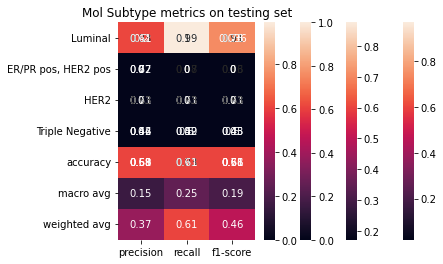

In [20]:
classification_results = pd.DataFrame()

#knn_er = KNeighborsClassifier(n_neighbors=5)
report, knn_er = get_classification_report(knn_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'KNN'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

#knn_pr = KNeighborsClassifier(n_neighbors=5)
report, knn_pr = get_classification_report(knn_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'KNN'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

#knn_her2 = KNeighborsClassifier(n_neighbors=5)
report, knn_her2 = get_classification_report(knn_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'KNN'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

#knn_mol_subtype = KNeighborsClassifier(n_neighbors=5)
report, knn_mol_subtype = get_classification_report(knn_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')
result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'KNN'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])


## Classification scores

In [21]:
classification_results.reset_index(drop = True, inplace = True)
classification_results.sort_values(by = ['Subtype', 'Algorithm'])

,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,KNN,ER,0.755877,0.706522,0.717506,0.553977,0.755877,0.706522,0.686941,0.621019,0.708108,0.578258,0.708108,0.609605,0.633743
2,KNN,HER2,0.817360,0.831522,0.668077,0.691428,0.817360,0.831522,0.735217,0.755032,0.832432,0.692944,0.832432,0.756310,0.503561
3,KNN,Mol Subtype,0.652803,0.641304,0.509614,0.462012,0.652803,0.641304,0.526912,0.530822,0.605405,0.371798,0.605405,0.460679,NaN
1,KNN,PR,0.681736,0.614130,0.662868,0.566308,0.681736,0.614130,0.647072,0.565136,0.632432,0.582398,0.632432,0.579777,0.575607


In [22]:
#classification_results.to_csv("Classification results/With feature scaling results for LR.csv", index = False)